<h1> Ecuación del calor</h1>

- Angel Mariel Osalde Salazar
- Julian Emiliano Ortiz Rivero 
- Miguel Omar Solis Rodriguez

# Introducción 

La ecuación del calor modela la distribución de temperaturas en un alambre 
aislado, cuyos extremos se mantienen a temperatura constante, a partir 
de una distribución inicial de temperaturas a lo largo del alambre $f(x)$. Aunque 
se pueden calcular soluciones exactas de la ecuación del calor usando series de 
Fourier, vamos a usar este problema como prototipo de la resolución numérica 
de ecuaciones parabólicas.

Considere la  ecuación del calor unidimensional 
$$
\begin{align*}
    u_{t}(x,t)=u_{xx}(x,t) \qquad \text{Para} \qquad 0\leq x \leq 1 \qquad \text{ y } \qquad 0 <t<b
\end{align*}
$$
con la condición inicial

$u(x,0)=f(x)$ para  $t=0$, $0\leq x< 1$
    
 y las condiciones de contorno
 
 $u(0,t)=g_{0}(t)$,
   
   
 $u(a,t)=g_{1}(t)$.
  

<h1> Ecuaciones diferenciales parciales Semi discretizado</h1>

Se trata de una técnica que combina la discretización de los problemas de contorno  con las técnicas de resolución de ecuaciones diferenciales ordinarias.
<b>Paso 1</b>. El primer paso consiste en seleccionar el entero $n$, y en definir el tamaño de paso $h=\frac{1}{n}$. La división del intervalo $[0, 1]$ en $n$ partes iguales de ancho $h$ y definir los puntos de la malla como $x_i = i h$, $i = 0, 1, . . . . , n$.


Obsérvese que para cada punto de la malla $x_i$ la solución $u(x_i , t)$ es una función de $t$
<b>Paso 2</b>. Fije  $t$ y discretice el lado derecho de la EDP. Utilizando diferencias finitas para aproximar $u_{xx}$, y obtenga

$$\frac{\partial u(x_i, t)}{\partial t}=\frac{u(x_{i+1}, t)-2u(x_i,t)+u(x_{i-1}, t)}{h^2}+O(h^2), \ \ i = 0, 1, . . . . , n.$$
<b>Paso 3.</b> Ignore el término de error $O(h^2)$ y sustituye $u(x_i,t)$ por la aproximación $y_{i}(t)$ en la fórmula
fórmula anterior. El resultado es

$$y_{i}'(t)=\frac{y_{i+1}(t)-2y_{i}(t)+y_{i-1}(t)}{h^2} \ \ i = 1, . . . . , n-1,$$

donde $\frac{dy_{i}(t)}{dt}=y_{i}'(t)$.
Reescriba la primera y la última ecuación utilizando las condiciones de contorno $y_{0}=g_{0}(t)$, $y_{n}=g_{1}(t)$


$$y_{1}'(t)=\frac{y_{2}(t)-2y_{1}(t)+y_{0}(t)}{h^2}=\frac{y_{2}(t)-2y_{1}(t)+g_{0}(t)}{h^2} $$
$$y_{n-1}'(t)=\frac{y_{n}(t)-2y_{n-1}(t)+y_{n-2}(t)}{h^2}=\frac{g_{1}(t)-2y_{n-1}(t)+y_{n-2}(t)}{h^2} $$


El sistema resultante, junto con la condición inicial $y_{i}(0) = f(x_{i}), i = 0, 1, . . . , n$, forma un sistema bien definido de ecuaciones diferenciales ordinarias que suele denominarse <b> semidiscretización (en el espacio) de la EDP.</b>
El sistema  semidiscretizado
$$\\ \\ y_{i}'(t)=\frac{y_{i+1}(t)-2y_{i}(t)+y_{i-1}(t)}{h^2}, \ i=1,2,..., n-1 \ \ y_{0}(t)=g_{0}(t), y_{n}(t)=g_{1}(t)$$

Es un sistema lineal de ecuaciones diferenciales ordinarias, puede escribirse en forma matricial como: 

$$y'(t)=\frac{l}{h^2}(Ay(t)+g(t)), \ \ y(0)=f(x)$$
$$y(t)= \begin{pmatrix} y_{1} \\ y_{2} \\ \vdots \\ y_{n-1} \end{pmatrix}, \  \ \ \begin{equation}
A=\begin{pmatrix}
-2 & 1 & \cdots &  0 \\
-1 & \ddots & \ddots &  0\\
\vdots & \ddots & \ddots& -1 \\
0 & \cdots& -1 &  -2
\end{pmatrix}
\end{equation},
 \ \ \ \ g(t)= \begin{pmatrix} g_{0}(t) \\ 0 \\ \vdots \\ g_{1}(t) \end{pmatrix}. $$
<b>Paso 4.</b> Resuelve el sistema de EDO por el método que prefieras.

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
%%javascript
MathJax.Hub.Queue(
  ["resetEquationNumbers", MathJax.InputJax.TeX],
  ["PreProcess", MathJax.Hub],
  ["Reprocess", MathJax.Hub]
);

<IPython.core.display.Javascript object>

# **Ejercicios ecuacion de calor**

In [3]:
import modulos_calor as calor
import numpy as np

### 1. **Considere la siguiente ecuación:**

\begin{align}
u_t &- u_{xx}=0, 0\leq x\leq \pi, t>0 \nonumber\\
& u(0,t)=0\nonumber\\
& u(\pi,t)=0 \\
&u(x,0)=3\nonumber
\end{align}

#### a) Menciona el tipo de condiciones de frontera de la ecuación $1$

Es de tipo **Periodica**

Pues, cumple con :

$$
\begin{align*}
    &U(0,t) = 0 \\
    &U(\pi,t) = 0 \\
    &\rightarrow U(0,t) = U(\pi,t) \\
\end{align*}
$$



#### b) Utiliza la aproximación hacia adelante para $u_t$ y central para $u_{xx}$. Encuentre una formula que aproxime la solución de $u(x,t)$ de $1$


La aproximación hacia adelante de $u_t$ esta dada por : 
$$
\begin{align*}
    u_t = \frac{u(x_0 , t_0 + k ) - u(x_0 , t_0)}{k} \\
\end{align*}
$$
y la aproximación central de $u_{xx}$. Esta dada por :
$$
\begin{align*}
    u_{xx} = \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2} \\
\end{align*}
$$

Sabiendo que la ecuación es : 
$$
\begin{align*}
    u_t = u_{xx}
\end{align*}
$$
podemos hacer : 
$$
\begin{align*}
    \frac{u(x_0 , t_0 + k ) - u(x_0 , t_0)}{k}  = \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2}
\end{align*}
$$
despejando la igualdad : 
$$
\begin{align*}
    &\frac{u(x_0 , t_0 + k ) - u(x_0 , t_0)}{k}  = \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2} \\ \\
    & u(x_0,t0+k) = u(x_0,t_0) + \frac{k}{h^2} \left(  u(x_0-h,t_0) -2u(x_0,t_0)+4(x_0+h,t_0) \right) \\ \\
    & u(x_0,t_0 + k ) = \frac{k}{h^2} u(x_0-h,t_0) + \left( 1 - \frac{2k}{h^2}\right)u(x_0,t_0) + \frac{k}{h^2}u(x_0+h,t_0)\\
\end{align*}
$$
Por lo tanto la ecuacion que aproxima la solución de $u(x,t)$ es : 
$$
\begin{align*}
    u(x_0,t_0 + k ) = \frac{k}{h^2} u(x_0-h,t_0) + \left( 1 - \frac{2k}{h^2}\right)u(x_0,t_0) + \frac{k}{h^2}u(x_0+h,t_0)
\end{align*}
$$

#### c) Para $h=0.25$ y $k=0.5$ aproxime $u(0.25,0.5)$ y $u(0.5,0.5)$

Entonces para $h=0.25$ y $k=0.5$ aproximamos $u(0.25,0.5)$ y $u(0.5,0.5)$
$$
\begin{align*}
    u(x_0,t_0 + k ) = \frac{k}{h^2} u(x_0-h,t_0) + \left( 1 - \frac{2k}{h^2}\right)u(x_0,t_0) + \frac{k}{h^2}u(x_0+h,t_0)
\end{align*}
$$



Para $u(0.25,0.5)$ : 
$$
\begin{align*}
     &u(0.25,0 + 0.5 ) = \frac{0.5}{0.25^2} u(0.25-0.25,0) + \left( 1 - \frac{2 \cdot 0.5}{0.25^2}\right)u(0.25,0) + \frac{0.5}{0.25^2}u(0.25+0.25,0) \\ \\
     &u(0.25, 0.5 ) = \frac{0.5}{0.25^2} u(0,0) + \left( 1 - \frac{2 \cdot 0.5}{0.25^2}\right)u(0.25,0) + \frac{0.5}{0.25^2}u(0.5,0) \\ \\
     &u(0.25, 0.5 ) = 8 \cdot 3 + \left( -15 \right) \cdot 3 + 8 \cdot 3 \\ \\
     &u(0.25, 0.5 ) = 3\\ \\
\end{align*}
$$



para $u(0.5,0.5)$ : 
$$
\begin{align*}
     &u(0.5,0 + 0.5 ) = \frac{0.5}{0.25^2} u(0.5-0.25,0) + \left( 1 - \frac{2 \cdot 0.5}{0.25^2}\right)u(0.5,0) + \frac{0.5}{0.25^2}u(0.5+0.25,0) \\ \\
     &u(0.5,0 + 0.5 ) = 8 \cdot u(0.25,0) + \left( -15 \right)\cdot u(0.5,0) + 8 \cdot u(0.25,0) \\ \\
     &u(0.5,0 + 0.5 ) = 8 \cdot 3 + \left( -15 \right)\cdot 3) + 8 \cdot 3  \\ \\
     &u(0.5,0 + 0.5 ) = 3 \\ \\
\end{align*}
$$

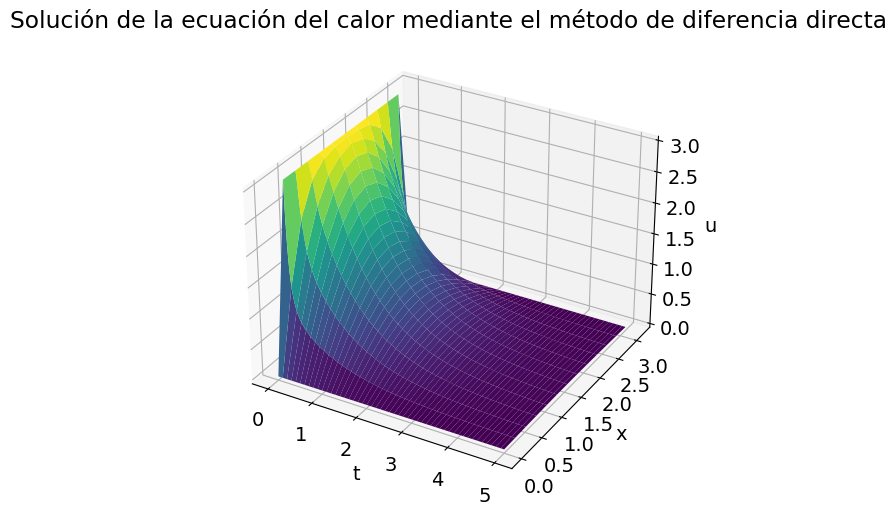

In [4]:
import math
# Parámetros
L = math.pi  # Longitud del dominio espacial
T = 5  # Tiempo total de simulación
Nx = 13  # Número de puntos de discretización espacial
Nt = 10000  # Número de pasos de tiempo
alpha = 1  # Difusividad térmica

f = lambda x :3
g0 = lambda x: 0
g1 = lambda x: 0

# Resolver la ecuación del calor
X, T, u = calor.solve_heat_equation2(f,g0,g1,L, T, Nx, Nt, alpha)

# Graficar la solución
calor.plot_heat_solution2(X, T, u)


#### d) Localice los puntos conocidos en una malla para obtener $u(0.25,0.5)$

Para $u(0.25,0.5)$ se necesitan conocer los siguientes puntos : 
$$
\begin{align*}
    &u(0,0) \\
    &u(0.25,0) \\ 
    &u(0.5,0) \\ 
\end{align*}
$$

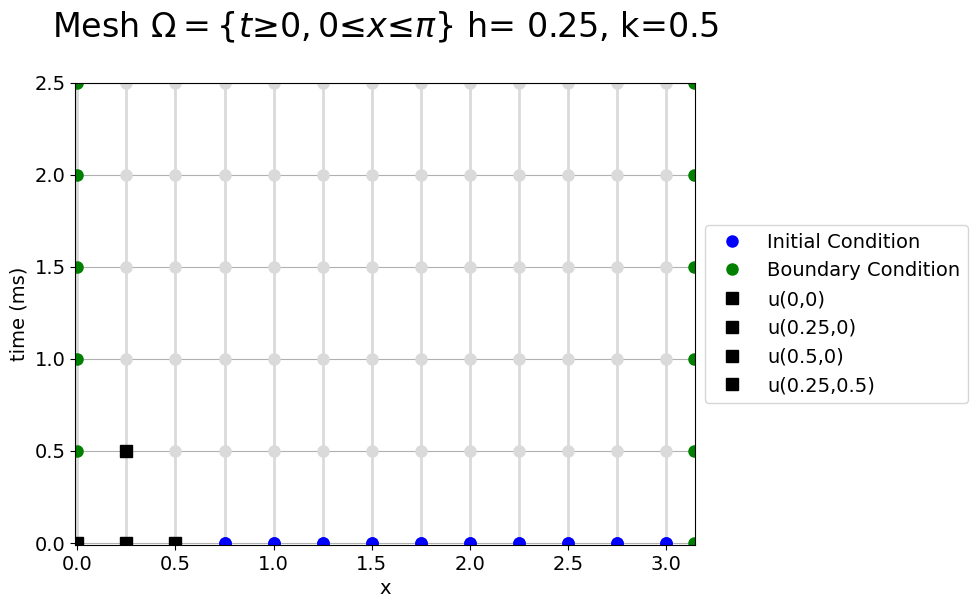

In [5]:
points_to_mark = [(0, 0), (0.25, 0), (0.5, 0), (0.25, 0.5)]
calor.plot_mesh_points(4, 2, points_to_mark)

#### e) Localice los puntos conocidos en una malla para obtener $u(0.5,0.5)$

Para $u(0.5,0.5)$ se necesitan conocer los siguientes puntos : 
$$
\begin{align*}
    &u(0.25,0) \\ 
    &u(0.5,0) \\ 
    &u(0.75,0) \\ 
\end{align*}
$$

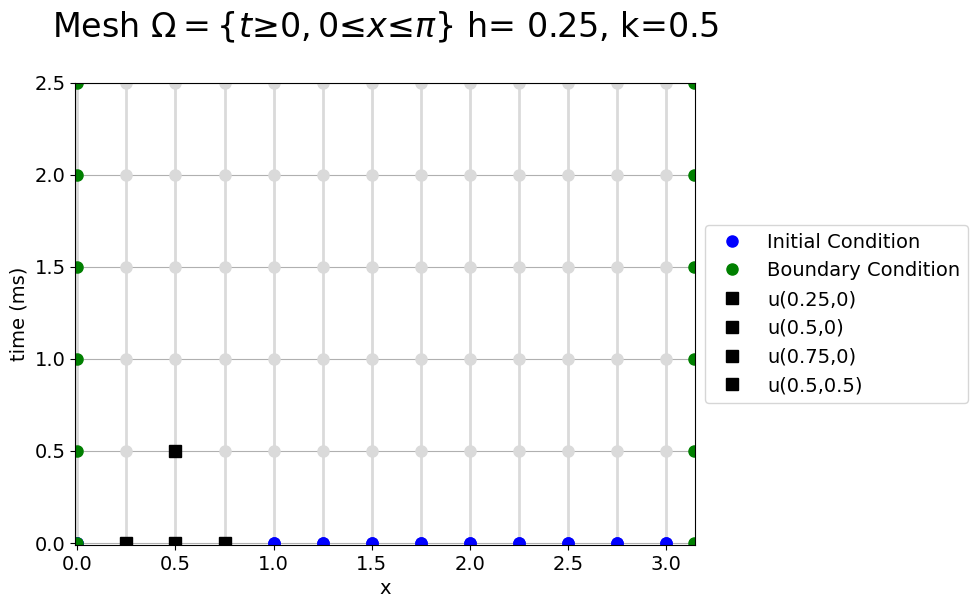

In [6]:
points_to_mark = [ (0.25, 0), (0.5, 0),(0.75, 0), (0.5, 0.5)]
calor.plot_mesh_points(4, 2, points_to_mark)

#### f) considere $x_0 = 0,  x_1 = h, x_2 =2h, ...$ y $t_0 =0, t_1 =k, t_2= 2k, ...$. Encuentre una ecuación en diferencias progresivas explícita para resolver $1$ 

### 2. **Considere la siguiente equación:**

\begin{align}
u_t &- u_{xx}=0, 0\leq x\leq 4, t>0 \nonumber\\
& u(0,t)=1\nonumber\\
& u(4,t)=2  \\
&u(x,0)=x^2\nonumber
\end{align}

#### a) Menciona el tipo de condiciones de frontera de la ecuación $2$

Son de tipo **Dirichlet** pues tienen la forma : 
$$
\begin{align*}
    u_t(x,t) =  f(x)  &\rightarrow  x^2 \qquad \qquad a\leq t \leq b\\   
    u_x(a,t) = g(t) &\rightarrow  1\\
    u_x(b,t) = h(t) &\rightarrow 2\\
\end{align*}
$$

#### b) Utiliza la aproximación hacia atras para $u_t$ y central para $u_{xx}$. Encuentra una formula que aproxime la solución de $u(x,t)$ de $2$


La aproximación hacia adelante de $u_t$ esta dada por : 
$$
\begin{align*}
    u_t = \frac{u(x_0 , t_0  ) - u(x_0 , t_0-k)}{k} \\
\end{align*}
$$
y la aproximación central de $u_{xx}$. Esta dada por :
$$
\begin{align*}
    u_{xx} = \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2} \\
\end{align*}
$$

Sabiendo que :
$$
\begin{align*}
    u_t = u_{xx} \\
\end{align*}
$$
Podemos hacer : 
$$
\begin{align*}
    \frac{u(x_0 , t_0  ) - u(x_0 , t_0-k)}{k} = \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2}
\end{align*}
$$
Despejando la igualdad : 
$$
\begin{align*}
    \frac{u(x_0 , t_0  ) - u(x_0 , t_0-k)}{k} &= \frac{u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0)}{h^2} \\\\
     u(x_0 , t_0- k) &= \frac{k}{h^2} \left(u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0) \right) \\ \\
     u(x_0 , t_0- k) &= u(x_0 , t_0  ) + \frac{k}{h^2} \left(u(x_0 - h, t_0 ) - 2u(x_0,t_0) + u(x_0 + h, t_0) \right) \\ \\
     u(x_0,t_0 - k ) &= \frac{k}{h^2} u(x_0-h,t_0) + \left( 1 - \frac{2k}{h^2}\right)u(x_0,t_0) - \frac{k}{h^2}u(x_0+h,t_0)
\end{align*}
$$

Entonces la ecuacion que aproxima $u(x,t)$ es : 
$$
\begin{align*}
    u(x_0,t_0 - k ) &= \frac{k}{h^2} u(x_0-h,t_0) + \left( 1 - \frac{2k}{h^2}\right)u(x_0,t_0) - \frac{k}{h^2}u(x_0+h,t_0)
\end{align*}
$$

### 3. **Dada la siguiente ecuación**

\begin{align}
4u_t &- u_{xx}=0, 0\leq x\leq 4, t>0 \nonumber\\
& u(0,t)=u(2,t)=0\\
&u(x,0)=2sin(\frac{\pi x}{2})-sin(\pi x)+4sin(2 \pi x) \nonumber
\end{align}

#### a) Considere $u(x,t)=2sin(\frac{\pi x}{2})e^{\frac{\pi ^2}{16}t}-sin(\pi x)e^{-\frac{\pi ^2}{4}t}-4sin(2 \pi x)e^{\pi ^{2} t}$  ¿ Es $u(x,t)$ solución de $3$?

Para comprobar la igualdad se puede hacer un código debemos calcular $u_t$ y $ u_{xx}$ respectivamente y probar la igualdad : 
$$
\begin{align*}
    4u_t - u_{xx} = 0
\end{align*}
$$
si se cumple, se tendria que $u(x,t)$ es solución de $3$ pero si no lo cumple, esta no seria una solución.

Para resolverlo podemos utilizar el siguiente código

In [7]:
import sympy as sp
x, t = sp.symbols('x t')
#ecuaciones

# se define la funcion u(x,t) a probar 
u = 2*sp.sin(sp.pi*x/2)*sp.exp(sp.pi**2*t/16) - sp.sin(sp.pi*x)*sp.exp(-sp.pi**2*t/4) - 4*sp.sin(2*sp.pi*x)*sp.exp(sp.pi**2*t)

# se define la ecuacion diferencial 4ut - uxx = 0
differential_equation = 4*sp.diff(u, t) - sp.diff(u, x, x)
# hacemos la comparación llamando a nuestra funcion y pasandole la funcion a probar y la ecuacion.
calor.verify_solution(u, differential_equation)

la funcion u(x, t) no es solución
pues el resultado fue : pi**2*(exp(pi**2*t/16)*sin(pi*x/2) - 32*exp(pi**2*t)*sin(2*pi*x))


Puesto que no se cumple la igualdad planteada, se concluye $u(x,t)=2sin(\frac{\pi x}{2})e^{\frac{\pi ^2}{16}t}-sin(\pi x)e^{-\frac{\pi ^2}{4}t}-4sin(2 \pi x)e^{\pi ^{2} t}$  no  es solución de $3$

#### b) Implementa un programa que aproxime  numericamente la solución de $3$

Dado que tenemos la ecuacion $u_t = u_{xx}$ podemos usar la aproximación hacia adelante y central para obtener la aproximación de la solución de $u(x,t)$

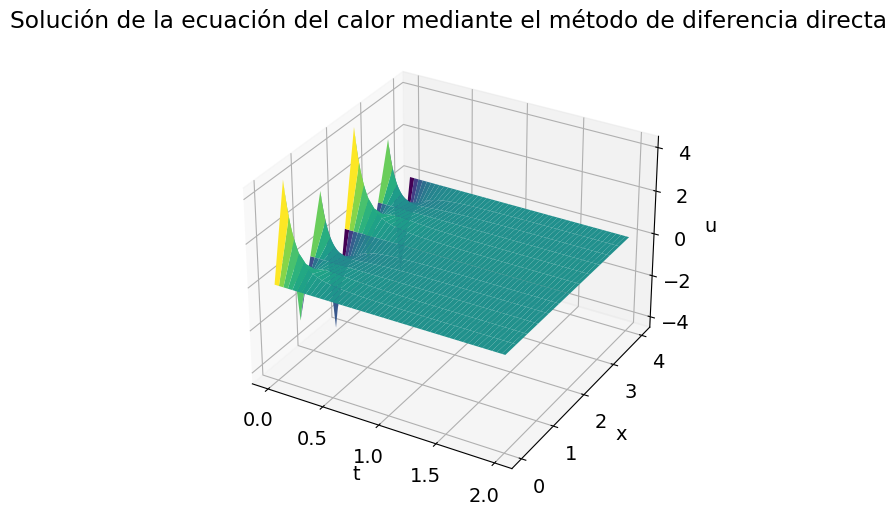

In [8]:
# Parámetros
L = 4  # Longitud del dominio espacial
T = 2  # Tiempo total de simulación
Nx = 13  # Número de puntos de discretización espacial
Nt = 10000  # Número de pasos de tiempo
alpha = 0.5  # Difusividad térmica

f = lambda x :2*np.sin(np.pi*x)  - np.sin(np.pi*x) + 4*np.sin(2*np.pi*x)

g0 = lambda x: 0
g1 = lambda x: 0

# Resolver la ecuación del calor
X, T, u = calor.solve_heat_equation2(f,g0,g1,L, T, Nx, Nt, alpha)

# Graficar la solución
calor.plot_heat_solution2(X, T, u)


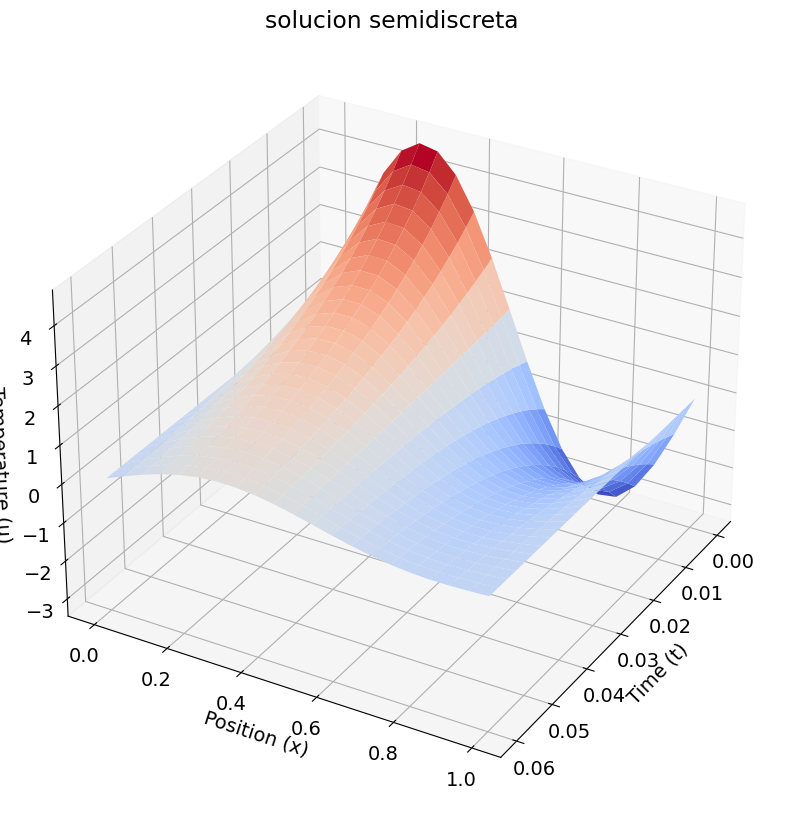

In [9]:
M = 20
N = 50
tend = 0.06

f = lambda x :2*np.sin(np.pi*x)-np.sin(np.pi*x)+4*np.sin(2*np.pi*x)
g0 = lambda x: 0
g1 = lambda x: 0

u1,x1,t1 = calor.solve_heat_equation(f,g0,g1,M,N,tend)
calor.plot_heat_solution(x1,t1,u1,"solucion semidiscreta ")

#### c) Grafique la función del inciso a) y compare con b)

a continuación se muestran las dos graficas resultantes. La que no es solucion y la solución.

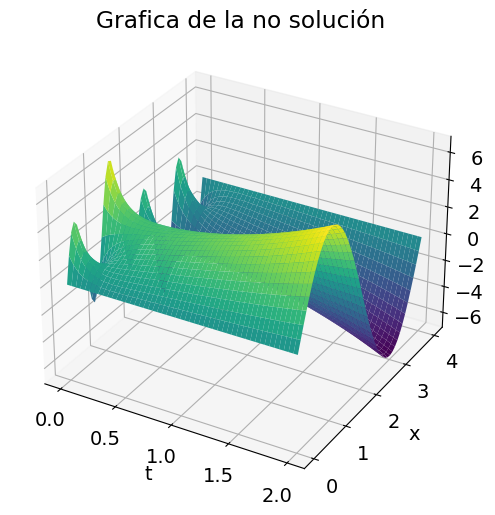

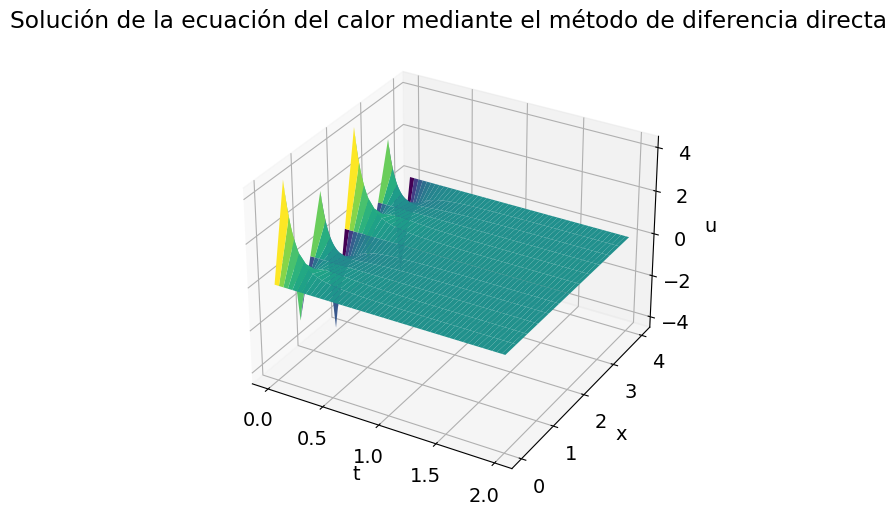

In [10]:
calor.graficar_no_solucion()
calor.plot_heat_solution2(X, T, u)

### 4. **Considere la ecuación del calor**

\begin{align}
u_t &- u_{xx}=0, 0\leq x\leq 1, t>0 \nonumber\\
& u(0,t)=u(1,t)=0\\
\end{align}
$$ u(x,0)=\left\{
\begin{array}{ll}
      2x & 0\leq x\leq 0.5\\
      2-2x & 0.5\leq x\leq 1 \\
\end{array} 
\right.$$


#### a) Utilizando la discretización completa,considere $h = 0.05$ y $k = 0.0012$,evolucione la solución desde t = 0 hasta t = 0,06. Trace la solución. Utilice gráficos gráficos interactivos, es posible que prefiera trazar la solución en cada paso de tiempo, dando el efecto de una película animada.


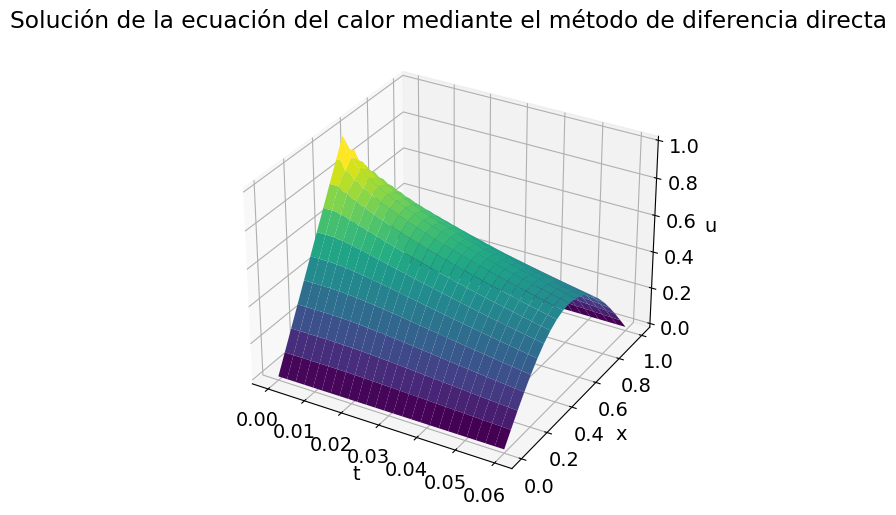

In [11]:

L = 1
T = 0.06
Nx = 21
Nt = 50
alpha = 1

def f(x):  # Initial condition function
    y = 2 * x
    y[x > 0.5] = 2 - 2 * x[x > 0.5]
    return y

g0 = lambda x: 0
g1 = lambda x: 0

# Resolver la ecuación del calor
X, T, u = calor.solve_heat_equation2(f,g0,g1,L, T, Nx, Nt, alpha)

# Graficar la solución
calor.plot_heat_solution2(X, T, u)

#### b) Repite la parte a, pero utiliza un paso de tiempo de $k = 0.0013$. Trace la solución de la misma manera que antes. ¿Puede explicar la diferencia en los resultados?

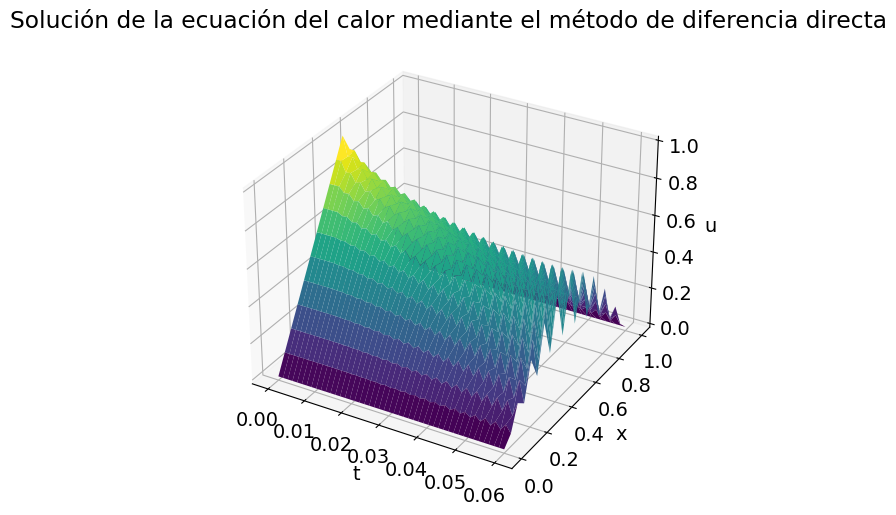

In [12]:
L = 1
T = 0.06
Nx = 21
Nt = 46
alpha = 1

def f(x):  # Initial condition function
    y = 2 * x
    y[x > 0.5] = 2 - 2 * x[x > 0.5]
    return y

g0 = lambda x: 0
g1 = lambda x: 0

# Resolver la ecuación del calor
X, T, u = calor.solve_heat_equation2(f,g0,g1,L, T, Nx, Nt, alpha)

# Graficar la solución
calor.plot_heat_solution2(X, T, u)

#### c)Forme el sistema semidiscreto para esta ecuación, usando una discretización espacial por diferencias finitas con $h = 0.05$, y utiliza un solver ODE para integrarlo desde t = 0 a t = 0.06. Represente la solución como antes. Cómo se comparan los resultados anteriores?

Primero definimos los parametros y calculamos las soluciones para ambos casos.

In [13]:
# Initial condition
def f1(x): # Example 1
    return 2*np.sin(np.pi*x)-np.sin(np.pi*x)+4*np.sin(2*np.pi*x)

def f2(x): # Example 2
    y = 2*x
    y[x>0.5] = 2-2*x[x>0.5]
    return y
# Boundary conditions
def g0(t):
    return 0
def g1(t):
    return 0

M = 20
N = 50
tend = 0.06

u2,x2,t2 = calor.solve_heat_equation(f2,g0,g1,M,N,tend)

ahora imprimimos la grafica 

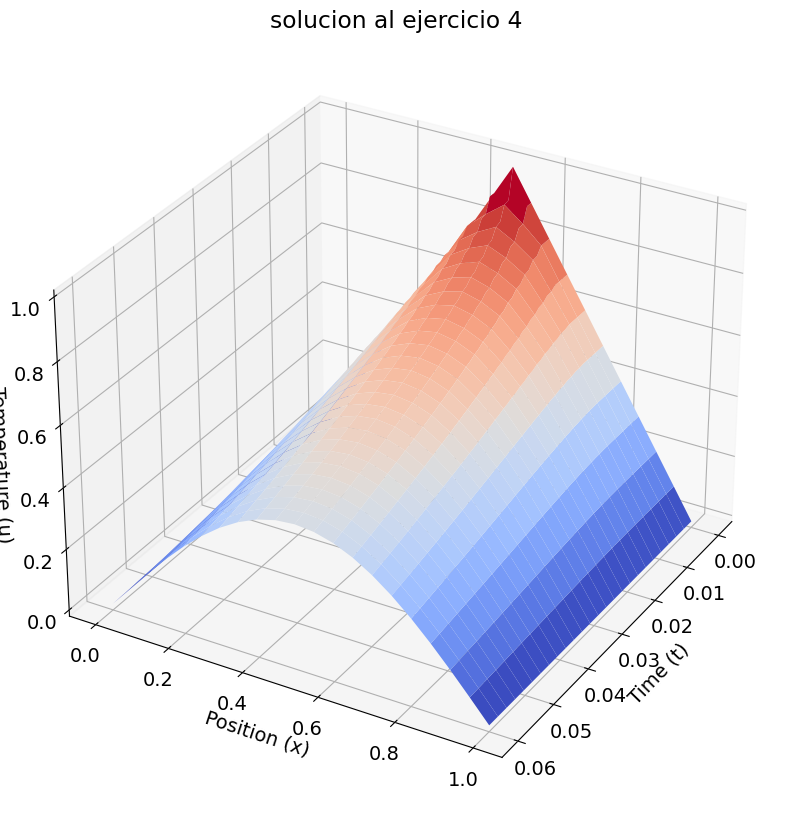

In [14]:
calor.plot_heat_solution(x2,t2,u2,"solucion al ejercicio 4")

# Conclusión

Durante esta unidad, se ha estudiado las ecuaciones diferenciales parciales (EDP)  en la modelización de fenómenos físicos relacionados con la difusión del calor a lo largo del tiempo y el espacio. El método de diferencias finitas ha sido nuestro enfoque como una herramienta de gran importancia para aproximar la solución de la ecuación del calor, permitiéndonos entender mejor la propagación térmica.

La aplicación del método de diferencias finitas implica la discretización tanto del espacio como del tiempo, transformando la EDP en un conjunto de ecuaciones algebraicas. Este enfoque algebraico simplifica la resolución del problema y posibilita la implementación de soluciones computacionales más precisas. Es importante destacar que la selección adecuada de los parámetros de discretización, tales como el tamaño de paso en el espacio y en el tiempo, resulta de suma importancia para asegurar la estabilidad y la precisión de los resultados obtenidos mediante este método numérico.


